# FOOOFing CRCNS hc1 data (EC & IC)

In [2]:
%load_ext autoreload
%autoreload 2
    
%matplotlib inline
import sys
import numpy as np
import scipy as sp
from scipy import io
import matplotlib.pyplot as plt
from fooof import FOOOF
from neurodsp import spectral

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


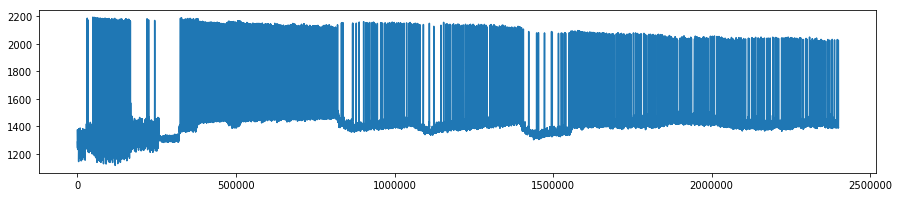

In [19]:
data = io.loadmat('/Users/rdgao/Documents/data/CRCNS/hc1/Data/d5331/d533101.mat', squeeze_me=True)
t = data['t']
x = data['data'].T
plt.figure(figsize=(15,3))
plt.plot(x[5,:])

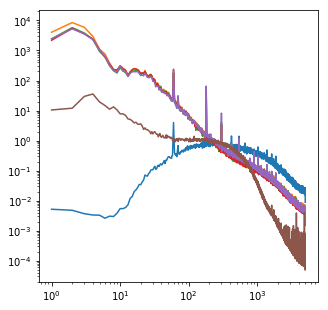

In [20]:
fs = 1./t[0]
f_axis, mpsd = spectral.compute_spectrum(x[:6,300000:],fs,'median')
plt.figure(figsize=(5,5))
plt.loglog(f_axis,mpsd.T)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 7 - 80 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                          Background Parameters (offset, knee, slope): 

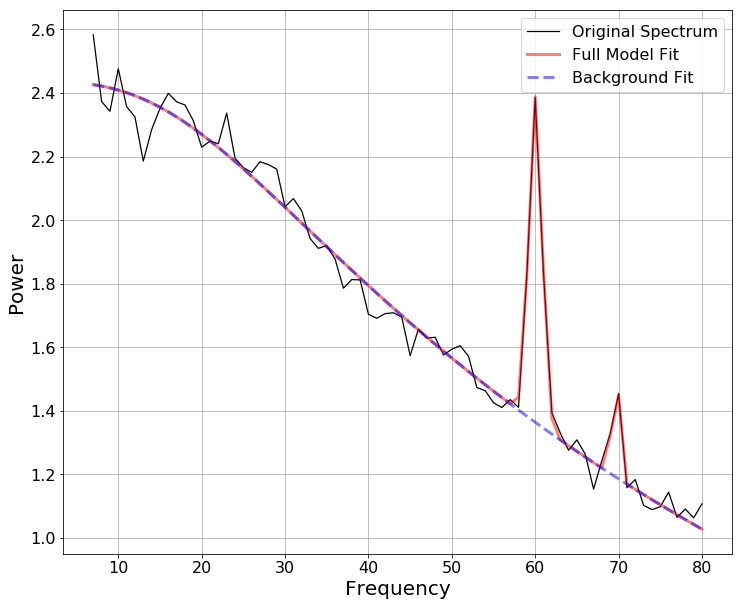

In [52]:
ff = FOOOF(background_mode='knee', max_n_peaks=2)
ff.report(f_axis, mpsd[1,:], (7,80))
print('Knee Freq:%.3fHz'%(ff.background_params_[1]**(1./ff.background_params_[2])))
print('Time constant:%.3fms'%(1000*((1./ff.background_params_[1])**(1./ff.background_params_[2]))/(np.pi*2)))